# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.104279e+01     7.836054e+00
 * time: 0.001741170883178711
     1     2.906868e+01     5.308060e+00
 * time: 0.007570981979370117
     2     2.379278e+01     7.842734e+00
 * time: 0.014226198196411133
     3     2.096279e+01     9.782306e+00
 * time: 0.021020174026489258
     4     1.136925e+01     2.193091e+00
 * time: 0.02895808219909668
     5     9.837822e+00     1.491667e+00
 * time: 0.03569602966308594
     6     9.473710e+00     1.594976e+00
 * time: 0.041131019592285156
     7     9.058841e+00     1.079276e+00
 * time: 0.04676198959350586
     8     8.661671e+00     9.332941e-01
 * time: 0.05230116844177246
     9     8.361912e+00     8.284698e-01
 * time: 0.05788707733154297
    10     8.190064e+00     6.184531e-01
 * time: 0.06354999542236328
    11     8.085462e+00     5.540877e-01
 * time: 0.06918811798095703
    12     7.998996e+00     4.755226e-01
 * time: 0.07482504844665527
    13     7.976634e+00     8.236985e-01
 * 

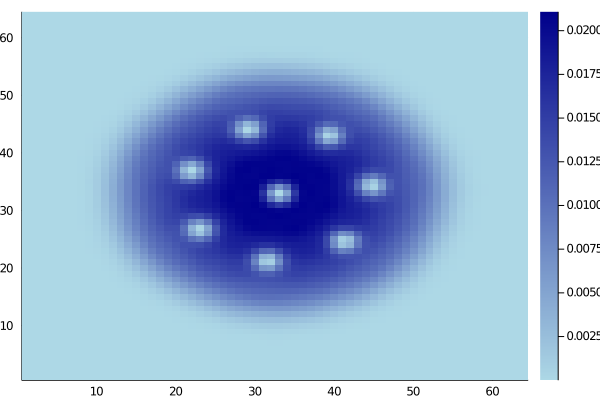

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)